To what extent can network performance indicators—such as signal strength, network type, reading from Signal Hound, SDR hardware reading and data throughput—be used to predict latency in cellular networks using regression analysis?

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
signal_metric = pd.read_csv("https://raw.githubusercontent.com/izaan-khudadad/Data-Mining/refs/heads/main/signal_metrics.csv", na_values=['?'])
signal_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [ ]:
df = signal_metric

df.columns = (
    df.columns
    .str.strip()                      
    .str.lower()                       
    .str.replace(r'[^\w\s]', '', regex=True)  
    .str.replace(r'\s+', '_', regex=True)     
)


print(df.columns.tolist())

['timestamp', 'locality', 'latitude', 'longitude', 'signal_strength_dbm', 'signal_quality_', 'data_throughput_mbps', 'latency_ms', 'network_type', 'bb60c_measurement_dbm', 'srsran_measurement_dbm', 'bladerfxa9_measurement_dbm']


In [5]:
df.describe()

,latitude,longitude,signal_strength_dbm,signal_quality_,data_throughput_mbps,latency_ms,bb60c_measurement_dbm,srsran_measurement_dbm,bladerfxa9_measurement_dbm
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000


In [6]:
df.isnull().sum()

timestamp                     0
locality                      0
latitude                      0
longitude                     0
signal_strength_dbm           0
signal_quality_               0
data_throughput_mbps          0
latency_ms                    0
network_type                  0
bb60c_measurement_dbm         0
srsran_measurement_dbm        0
bladerfxa9_measurement_dbm    0
dtype: int64

In [7]:
X = df[['signal_strength_dbm', 'data_throughput_mbps',
        'network_type', 'bb60c_measurement_dbm', 'srsran_measurement_dbm',
        'bladerfxa9_measurement_dbm']]

y = df['latency_ms']

X = pd.get_dummies(X, drop_first=True)

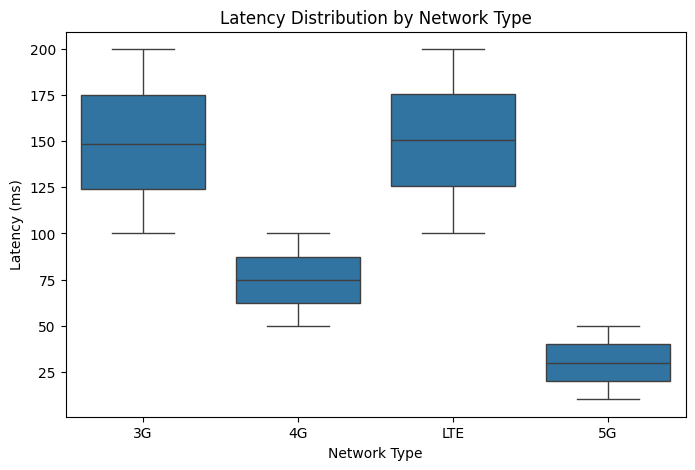

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='network_type', y='latency_ms')
plt.title("Latency Distribution by Network Type")
plt.xlabel("Network Type")
plt.ylabel("Latency (ms)")
plt.show()

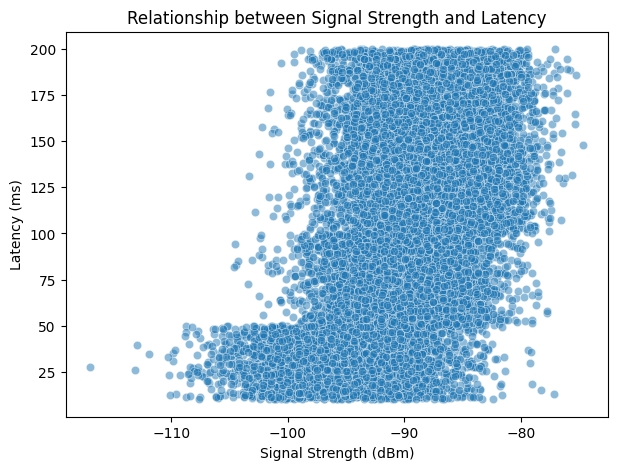

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='signal_strength_dbm', y='latency_ms', data=df, alpha=0.5)
plt.title("Relationship between Signal Strength and Latency")
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Latency (ms)")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f} ms")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} ms")
print(f"R² Score: {r2:.3f}")

Model Evaluation:
Mean Absolute Error (MAE): 18.14 ms
Root Mean Squared Error (RMSE): 22.42 ms
R² Score: 0.842


In [14]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                      Feature  Coefficient
7            network_type_LTE     9.968396
4  bladerfxa9_measurement_dbm     0.096919
2       bb60c_measurement_dbm     0.014040
1        data_throughput_mbps     0.003966
3      srsran_measurement_dbm    -0.007922
0         signal_strength_dbm    -0.088481
5             network_type_4G   -65.726637
6             network_type_5G  -110.754302


1. Network Type is the most powerful predictor of latency — 5G dramatically reduces delay compared to 4G and LTE.
2. Signal Strength (dBm) also matters — better signal = lower latency.
3. Device-level readings (the measurement variables) have much smaller effects.
4. Removing signal_quality simplified the model without losing predictive power — a good data-driven call.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = df.dropna(subset=['latency_ms','signal_strength_dbm','data_throughput_mbps','network_type','timestamp'])

# Feature engineering
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

In [17]:
df['lat_bucket'] = df['latitude'].round(3)
df['lon_bucket'] = df['longitude'].round(3)

dev_cols = ['bb60c_measurement_dbm','srsran_measurement_dbm','bladerfxa9_measurement_dbm']
df['device_dbm_mean'] = df[dev_cols].mean(axis=1)

# Select features (drop signal_quality since it was mostly zero)
num_features = ['signal_strength_dbm','data_throughput_mbps','device_dbm_mean','hour','weekday']
cat_features = ['network_type','locality','lat_bucket','lon_bucket']  # feel free to remove 'locality' if too many levels

X = df[num_features + cat_features]
y = df['latency_ms']

# Preprocess
pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features),
    ('num', 'passthrough', num_features)
])

In [18]:
rf = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None, min_samples_leaf=3, n_jobs=-1)

pipe = Pipeline([
    ('prep', pre),
    ('model', rf)
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [20]:
import math
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(((y_test - y_pred)**2).mean())
r2 = r2_score(y_test, y_pred)

print(f"RandomForest  MAE: {mae:.2f} ms | RMSE: {rmse:.2f} ms | R²: {r2:.3f}")

RandomForest  MAE: 18.43 ms | RMSE: 22.90 ms | R²: 0.835


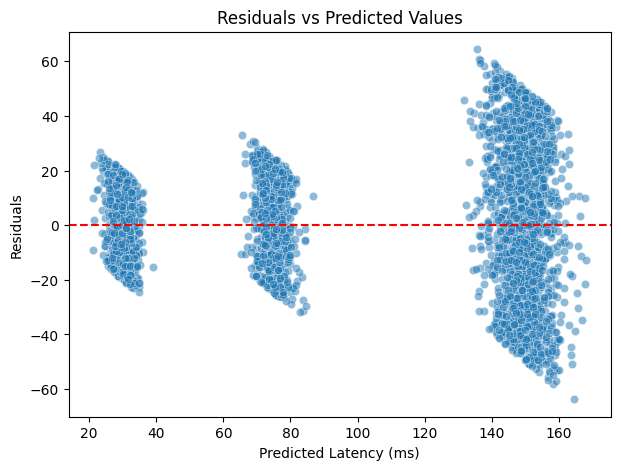

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Latency (ms)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

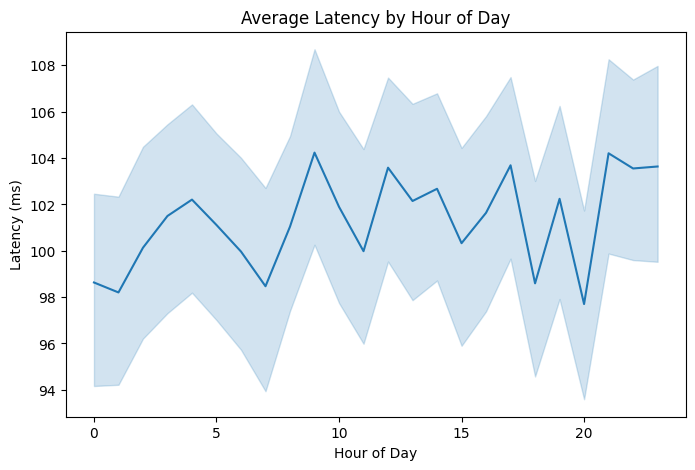

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(x='hour', y='latency_ms', data=df)
plt.title("Average Latency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Latency (ms)")
plt.show()

In [23]:
from sklearn.linear_model import Ridge

In [24]:
features = ['signal_strength_dbm','data_throughput_mbps',
            'bb60c_measurement_dbm','srsran_measurement_dbm',
            'bladerfxa9_measurement_dbm','network_type']

X = df[features].copy()
y = df['latency_ms'].copy()


In [ ]:

X = pd.get_dummies(X, columns=['network_type'], drop_first=True)
num_cols = [c for c in X.columns if not c.startswith('network_type_')]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [26]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [27]:
# Evaluate
y_pred = ridge.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(((y_test - y_pred)**2).mean())
r2   = r2_score(y_test, y_pred)
print(f"Ridge Regression - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

Ridge Regression - MAE: 18.15, RMSE: 22.43, R²: 0.841


In [28]:
# Coefficients (standardized units for numeric cols)
coef = pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)
print("\nTop coefficients:\n", coef.head(10))


Top coefficients:
 network_type_LTE              31.454345
bladerfxa9_measurement_dbm     6.753003
srsran_measurement_dbm         5.673036
bb60c_measurement_dbm          1.638818
data_throughput_mbps           0.053448
signal_strength_dbm           -1.560616
network_type_4G              -44.205471
network_type_5G              -88.943214
dtype: float64


Correlation with Latency (ms):

latency_ms                    1.000000
bladerfxa9_measurement_dbm    0.524406
bb60c_measurement_dbm         0.523898
device_dbm_mean               0.523888
srsran_measurement_dbm        0.522373
signal_strength_dbm           0.503550
latitude                     -0.002053
lat_bucket                   -0.002072
longitude                    -0.006455
lon_bucket                   -0.006499
data_throughput_mbps         -0.668173
signal_quality_                    NaN
Name: latency_ms, dtype: float64


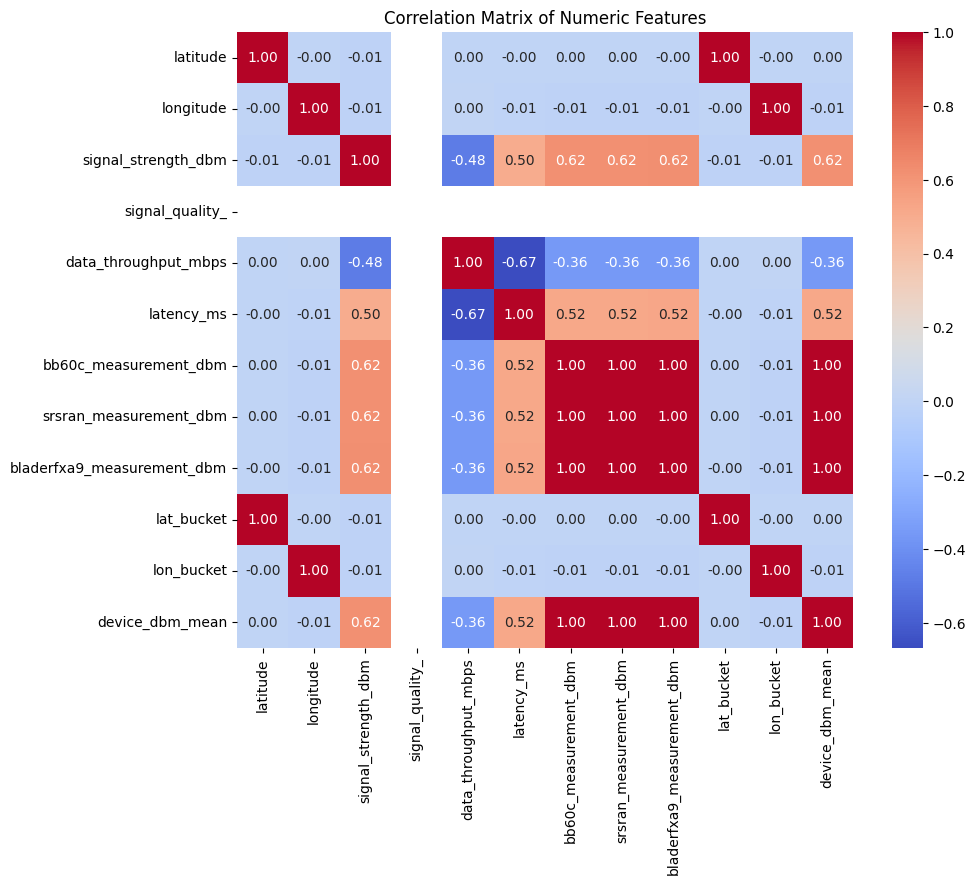

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation with target variable (latency)
print("Correlation with Latency (ms):\n")
print(corr_matrix['latency_ms'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()